In [1]:
import pandas as pd
import numpy as np
import random
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

import matplotlib.pyplot as plt

In [9]:
file = 'C:/Program Files (x86)/OANDA - MetaTrader - 1/tester/files/EURUSD-20181218000000-LiveData-Live.csv'

In [3]:
data_preview = pd.read_csv(file,nrows=5)

In [4]:
data_preview

profit  gross_profit  gross_loss  num_trades  num_long_trades  \
0    0.39         17.57      -17.18          49               36   
1    1.33          9.27       -7.94           7                4   
2    5.91          9.78       -3.87           9                8   
3    3.91         15.21      -11.30          14                5   
4    5.23         17.62      -12.39          15               11   

   num_short_trades  profit_factor  expected_payoff  recovery_factor  \
0                13           1.02             0.01             0.06   
1                 3           1.17             0.19             0.18   
2                 1           2.53             0.66             2.26   
3                 9           1.35             0.28             0.47   
4                 4           1.42             0.35             0.93   

   drawdown_dol  drawdown_pct  sharpe  sortino  bprofit  bgross_profit  \
0          6.79         0.679  0.0078   0.0136    -5.96           7.05   
1          7.32         0.732  0.0467   0.0401    -7.32           0.00   
2          2.62         0.262  0.2303   2.3452    -2.03           1.84   
3          8.37         0.833  0.0997   0.0984     0.69           7.81   
4          5.61         0.560  0.1276   0.1685    -3.57           7.38   

   bgross_loss  bnum_trades  bnum_long_trades  bnum_short_trades  \
0       -13.01           39                29                 10   
1        -7.32            1                 0                  1   
2        -3.87            8                 7                  1   
3        -7.12           11                 4                  7   
4       -10.95            8                 6                  2   

   bprofit_factor  bexpected_payoff  brecovery_factor  bdrawdown_dol  \
0            0.54             -0.15             -0.88           6.79   
1            0.00             -7.32             -1.00           7.32   
2            0.48             -0.25             -0.77           2.62   
3            1.10              0.06              0.10           6.65   
4            0.67             -0.45             -0.64           5.61   

   bdrawdown_pct  bsharpe  bsortino  fprofit  fgross_profit  fgross_loss  \
0          0.679  -0.2208   -0.3352     6.35          10.52        -4.17   
1          0.732   0.0000    0.0000     8.65           9.27        -0.62   
2          0.262  -0.2895   -0.9063     7.94           7.94         0.00   
3          0.662   0.0263    0.0190     3.22           7.40        -4.18   
4          0.560  -0.1445   -0.1884     8.80          10.24        -1.44   

   fnum_trades  fnum_long_trades  fnum_short_trades  fprofit_factor  \
0           10                 7                  3            2.52   
1            6                 4                  2           14.95   
2            1                 1                  0            1.00   
3            3                 1                  2            1.77   
4            7                 5                  2            7.11   

   fexpected_payoff  frecovery_factor  fdrawdown_dol  fdrawdown_pct  fsharpe  \
0              0.64              2.54           2.50          0.248   0.3636   
1              1.44             13.95           0.62          0.061   0.5571   
2              7.94              1.00           0.00          0.000   2.0000   
3              1.07              0.77           4.18          0.418   0.2329   
4              1.26             11.28           0.78          0.078   0.5938   

   fsortino  vprofit  vgross_profit  vgross_loss  vnum_trades  \
0    0.5740      0.0            0.0          0.0            0   
1   12.0000      0.0            0.0          0.0            0   
2    2.0000      0.0            0.0          0.0            0   
3    6.0000      0.0            0.0          0.0            0   
4    4.8068      0.0            0.0          0.0            0   

   vnum_long_trades  vnum_short_trades  vprofit_factor  vexpected_payoff  \
0                 0                  0    

In [5]:
dtypes = data_preview.dtypes

dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]
column_types = dict(zip(dtypes_col, dtypes_type))

for key, value in column_types.items():
    if value == 'float64':
        column_types[key] = 'float32'
    if value == 'int64':
        column_types[key] = 'int8'

column_types['Long_Back_1'] = 'int16'
column_types['Long_Back_2'] = 'int16'
column_types['Short_Back_1'] = 'int16'
column_types['Short_Back_2'] = 'int16'
column_types['go_back'] = 'int16'
# column_types['back_split'] = 'datetime'
# column_types['fore_split'] = 'datetime'
# column_types['verify_split'] = 'datetime'
# column_types['cutoff_split'] = 'datetime'
print(column_types)

{'profit': 'float32', 'gross_profit': 'float32', 'gross_loss': 'float32', 'num_trades': 'int8', 'num_long_trades': 'int8', 'num_short_trades': 'int8', 'profit_factor': 'float32', 'expected_payoff': 'float32', 'recovery_factor': 'float32', 'drawdown_dol': 'float32', 'drawdown_pct': 'float32', 'sharpe': 'float32', 'sortino': 'float32', 'bprofit': 'float32', 'bgross_profit': 'float32', 'bgross_loss': 'float32', 'bnum_trades': 'int8', 'bnum_long_trades': 'int8', 'bnum_short_trades': 'int8', 'bprofit_factor': 'float32', 'bexpected_payoff': 'float32', 'brecovery_factor': 'float32', 'bdrawdown_dol': 'float32', 'bdrawdown_pct': 'float32', 'bsharpe': 'float32', 'bsortino': 'float32', 'fprofit': 'float32', 'fgross_profit': 'float32', 'fgross_loss': 'float32', 'fnum_trades': 'int8', 'fnum_long_trades': 'int8', 'fnum_short_trades': 'int8', 'fprofit_factor': 'float32', 'fexpected_payoff': 'float32', 'frecovery_factor': 'float32', 'fdrawdown_dol': 'float32', 'fdrawdown_pct': 'float32', 'fsharpe': 'f

In [6]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [7]:
data_preview.columns[52:57]

Index(['Long_Back_1', 'Long_Back_2', 'Short_Back_1', 'Short_Back_2',
       'go_back'],
      dtype='object')

In [12]:
#data = pd.read_csv(file,dtype=column_types,parse_dates=['back_split','fore_split','verify_split','cutoff_split'],infer_datetime_format=True)
cols = np.append(data_preview.columns[13:40].values,data_preview.columns[52:57].values)
data = pd.read_csv(file,usecols=cols,dtype=column_types)
#data = data[(data.bprofit>0)&(data.fprofit>0)]
print(mem_usage(data))
print(data.shape)
print(len(data.go_back.unique()))

0.49 MB
(5183, 32)
1


In [13]:
a = data[((data.bprofit>0)&(data.fprofit>0)&(data.bnum_trades==1)&(data.fnum_trades==1))]
b = data[((data.bsharpe>20)&(data.fnum_trades<4)&(data.fexpected_payoff>1))]
#c = data[((data.bgross_loss==0)&(data.fgross_loss==0)&(data.bgross_profit>0.65)&(data.fgross_profit>0.55)&(data.fnum_trades==1))]
d = data[(data.bsharpe>100)&(data.fexpected_payoff>-2)]
e = data[(data.bexpected_payoff>5)&(data.fexpected_payoff>5)]
f = data[(data.brecovery_factor>100)&(data.brecovery_factor<200)&(data.frecovery_factor>50)]
g = data[(data.bsortino>5)&(data.fsortino>100)]

print('a',a,'\n')
print('b',b,'\n')
print('d',d,'\n')
print('e',e,'\n')
print('f',f,'\n')
print('g',g,'\n')

a       bprofit  bgross_profit  bgross_loss  bnum_trades  bnum_long_trades  \
3179     1.34           1.34          0.0            1                 1   
3823     1.97           1.97          0.0            1                 1   
4605     0.04           0.04          0.0            1                 0   

      bnum_short_trades  bprofit_factor  bexpected_payoff  brecovery_factor  \
3179                  0             1.0              1.34               1.0   
3823                  0             1.0              1.97               1.0   
4605                  1             1.0              0.04               1.0   

      bdrawdown_dol  bdrawdown_pct  bsharpe  bsortino  fprofit  fgross_profit  \
3179            0.0            0.0      2.0       2.0     6.98           6.98   
3823            0.0            0.0      2.0       2.0     0.88           0.88   
4605            0.0            0.0      2.0       2.0     0.20           0.20   

      fgross_loss  fnum_trades  fnum_long_trades  f

In [191]:
# Normalize
cols = data.columns.drop(['vprofit','go_back'])
data[cols]=(data[cols]-data[cols].min())/(data[cols].max()-data[cols].min())

In [192]:
data.columns[:13]

Index(['bprofit', 'bgross_profit', 'bgross_loss', 'bnum_trades',
       'bnum_long_trades', 'bnum_short_trades', 'bprofit_factor',
       'bexpected_payoff', 'brecovery_factor', 'bdrawdown_dol',
       'bdrawdown_pct', 'bsharpe', 'bsortino'],
      dtype='object')

In [193]:
# Calculate scores from normed data
data["bscore1"] = data.bexpected_payoff * (1 - data.bdrawdown_pct) * (1 - data.bnum_trades)
data["fscore1"] = data.fexpected_payoff * (1 - data.fdrawdown_pct) * (1 - data.fnum_trades)

data["bscore2"] = (1 - data.bgross_loss) * (1 - data.bnum_trades) * (1 - data.bdrawdown_pct)
data["fscore2"] = (1 - data.fgross_loss) * (1 - data.fnum_trades) * (1 - data.fdrawdown_pct)

cols = ['bscore1','bscore2','fscore1','fscore2']
data[cols]=(data[cols]-data[cols].min())/(data[cols].max()-data[cols].min())


In [8]:
def performance(*args):
    x = []
    count = 0
    found = False
    for i in range(510,0,-1):
        try:
            for a in args:
                b = a[a.go_back==i].vprofit.mean()#.values
                #b = bb[random.randint(0,len(bb)-1)]
                if math.isnan(b):
                    pass
                else:
                    x.append(b)
                    found = True
            if found:
                count += 1
                found = False
        except:
            pass
    #random.shuffle(x)
    equity = [ sum(x[:i]) for i,v in enumerate(x) ]
    equity.append(sum(x))
    
    return equity, x, count

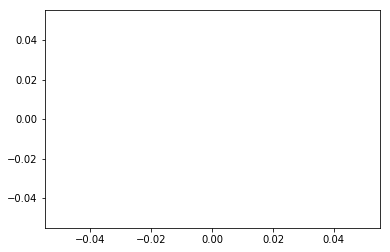

total return:           0
average return per day: nan
sharpe of returns:      nan
number of days          0


C:\Users\dell\Anaconda3\envs\python363\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dell\Anaconda3\envs\python363\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\dell\Anaconda3\envs\python363\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\dell\Anaconda3\envs\python363\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\dell\Anaconda3\envs\python363\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
import math
import random

a = data[((data.bprofit>0)&(data.fprofit>0)&(data.bnum_trades==1)&(data.fnum_trades==1))]
b = data[((data.bsharpe>20)&(data.fnum_trades<4)&(data.fexpected_payoff>1))]
#c = data[((data.bgross_loss==0)&(data.fgross_loss==0)&(data.bgross_profit>0.65)&(data.fgross_profit>0.55)&(data.fnum_trades==1))]
d = data[(data.bsharpe>100)&(data.fexpected_payoff>-2)]
e = data[(data.bexpected_payoff>5)&(data.fexpected_payoff>5)]
f = data[(data.brecovery_factor>100)&(data.brecovery_factor<200)&(data.frecovery_factor>50)]
g = data[(data.bsortino>5)&(data.fsortino>100)]

#normalized...
# bvals = data.bnum_trades.sort_values().unique()
# fvals = data.fnum_trades.sort_values().unique()
# j = data[(data.bprofit_factor>0.012)&(data.fprofit>0.2)&(data.bnum_trades==bvals[1])&(data.fnum_trades==fvals[1])]

# h = data[(data.bscore1>0.2)&(data.fscore1>0.2)]
# i = data[(data.bscore2>0.7)&(data.fscore2>0.7)] # Just terrible
# k = data[(data.bsharpe>0.001)&(data.bdrawdown_pct<0.00051)&(data.fexpected_payoff>0.1)]


# equity, x, count = performance(a)

plt.plot(equity)
plt.show()

print('total return:          ',round(sum(x),2))
print('average return per day:',np.mean(x))
print('sharpe of returns:     ',np.mean(x)/np.std(x))
print('number of days         ', count)

In [150]:
data.fscore2.max()

1.0

In [73]:
bvals = data.bnum_trades.sort_values().unique()

In [72]:
fvals = data.fnum_trades.sort_values().unique()

In [40]:
dat = data[data.columns[13:40]]

In [41]:
dat

bprofit  bgross_profit  bgross_loss  bnum_trades  bnum_long_trades  \
0         1.540000       7.830000    -6.290000           13                10   
1        -0.130000       4.220000    -4.350000           14                 7   
2        -7.370000       3.960000   -11.330000           33                17   
3        -5.510000      10.590000   -16.100000           11                 6   
4         2.810000       7.650000    -4.840000           21                12   
5         1.290000       9.510000    -8.220000           31                 9   
6         3.230000      10.940000    -7.710000           27                15   
7        -3.590000       7.880000   -11.470000           30                22   
8        -0.940000       1.790000    -2.730000            6                 1   
9         6.330000       7.360000    -1.030000            5                 2   
10       -0.130000       7.540000    -7.670000           22                 5   
11       -7.910000       0.000000    -7.910000            1                 0   
12        0.120000       8.340000    -8.220000           19                10   
13       -8.160000       1.600000    -9.760000           18                 9   
14       -6.930000       2.590000    -9.520000           23                14   
15       -1.260000       4.560000    -5.820000           16                 0   
16       -4.750000       2.020000    -6.770000           12                 3   
17       -4.000000       3.340000    -7.340000           12                 6   
18      -12.980000       5.400000   -18.379999           29                11   
19        7.730000       8.900000    -1.170000            8                 7   
20      -18.080000       3.150000   -21.230000           19                 8   
21       -6.210000       7.890000   -14.100000           36                36   
22       -3.280000       8.050000   -11.330000           18                10   
23        8.200000      11.190000    -2.990000           12                 8   
24        6.660000      14.510000    -7.850000           30                12   
25       -0.980000       8.780000    -9.760000           25                14   
26        8.070000      15.160000    -7.090000           34                20   
27      -14.070000       0.550000   -14.620000            7                 5   
28       -6.400000       4.920000   -11.320000           14                 7   
29      -11.490000       9.090000   -20.580000           14                 6   
30        3.600000      10.780000    -7.180000           22                13   
31       -8.750000       3.940000   -12.690000           26                15   
32       -9.600000       8.050000   -17.650000           32                21   
33       -1.810000       2.250000    -4.060000            8                 3   
34       -1.860000       1.420000    -3.280000            6                 4   
35       -0.930000       8.310000    -9.240000           23                 9   
36        3.890000      14.900000   -11.010000           20                13   
37       -6.530000       3.710000   -10.240000           13                10   
38        4.920000      15.850000   -10.930000           46                 7   
39       -3.790000       6.280000   -10.070000           33                13   
40        3.230000       5.620000    -2.390000           12                 1   
41       -5.080000       2.250000    -7.330000           13                 6   
42       -6.500000       8.620000   -15.120000           33                23   
43        5.670000       9.590000    -3.920000           11                 5   
44        4.980000       9.510000    -4.530000           19                 7   
45       -1.560000       5.680000    -7.240000           21                12   
46        0.790000       7.430000    -6.640000            8                 5   
47       -5.420000       9.210000   -14.630000           32                16   
48      -11.020000       6.870000   -17.88

In [52]:
for col in dat.columns:
    print(col,np.corrcoef(dat[col],dat.vprofit)[0][1])

bprofit 0.0341220506105
bgross_profit -0.0746555722434
bgross_loss 0.0954867909977
bnum_trades -0.146887027244
bnum_long_trades -0.1244828896
bnum_short_trades -0.115476380899
bprofit_factor 0.00622489170313
bexpected_payoff -0.00789137677817
brecovery_factor 0.0075055854489
bdrawdown_dol -0.0501089755111
bdrawdown_pct -0.050127649261
bsharpe 0.000370609047394
bsortino 0.0107779379709
fprofit 0.0181022016889
fgross_profit -0.0418211549529
fgross_loss 0.058483720882
fnum_trades -0.135351298147
fnum_long_trades -0.081928974975
fnum_short_trades -0.105970367762
fprofit_factor 0.00989665167043
fexpected_payoff -0.0119043504023
frecovery_factor 0.010879134813
fdrawdown_dol -0.0326864789934
fdrawdown_pct -0.0326896166685
fsharpe 0.00391761517299
fsortino -0.000244326286349
vprofit 1.0
